In [1]:
from GlassBox.ebm.ebm_utils import EBMGridSearch
from interpret.glassbox import ExplainableBoostingRegressor
import matplotlib.pyplot as  plt
import pandas as pd
%reload_ext autoreload
%autoreload 2

In [2]:
EBM_parameter = dict(
    learning_rate= [0.005, 0.01, 0.02, 0.03],
    min_samples_leaf=[2, 3, 4, 5, 6, 7, 8, 9, 10],
    max_leaves=[2, 3, 4, 5, 6, 7],
    interactions=[10, 15, 20],
)
gridsearch_parameters = dict( # unbalanced sources
    train="../../outputs/scores/scores_tr.csv",
    valid="../../outputs/scores/scores_vl.csv",
    test="../../outputs/scores/scores_ts.csv",
    task="Regression",
    nDCG_at=15
)
gridsearch_parameters2 = dict( # balanced sources
    train="../../outputs/bal_scores/scores_tr.csv",
    valid="../../outputs/bal_scores/scores_vl.csv",
    test="../../outputs/bal_scores/scores_ts.csv",
    task="Regression",
    nDCG_at=15
)

# Grid-search

In [3]:
gs = EBMGridSearch(**gridsearch_parameters)

In [4]:
best_ = gs.grid_search(
    EBMModel=ExplainableBoostingRegressor,  
    hyperparameters=EBM_parameter)
gs.save_model(best_[0], name="EBMReg_unbalanced")

100%|██████████| 648/648 [03:06<00:00,  3.47it/s, nDCG_15_at=0.864]


# Metric evaluation

In [5]:
best_model = gs.load_model(name="./saved_models/EBMReg_unbalanced")

In [6]:
best_model   

ExplainableBoostingRegressor(feature_names=['Education', 'City', 'Skills',
                                            'SoftSkills', 'Age', 'Language',
                                            'Certificates', 'Experience',
                                            'Salary', 'SmartWork',
                                            'Experience_abroad'],
                             interactions=20, learning_rate=0.03, max_leaves=2,
                             max_rounds=8000, n_jobs=-1)

In [7]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.9317,0.9236,0.9042
Validation,0.9683,0.8838,0.8636
Test,0.9367,0.8887,0.8673


In [8]:
from interpret import show
show(best_model.explain_global())

C:\Users\Andrea\anaconda3\envs\FindHR\Lib\site-packages\interpret\visual\_udash.py:117: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selector.columns[col_idx], selector.iloc[i][col_idx]


<!-- http://127.0.0.1:7001/3022037707344/ -->

# Explanation

In [9]:
best_model = gs.load_model(name="./saved_models/EBMReg_unbalanced")

In [10]:
best_model

ExplainableBoostingRegressor(feature_names=['Education', 'City', 'Skills',
                                            'SoftSkills', 'Age', 'Language',
                                            'Certificates', 'Experience',
                                            'Salary', 'SmartWork',
                                            'Experience_abroad'],
                             interactions=20, learning_rate=0.03, max_leaves=2,
                             max_rounds=8000, n_jobs=-1)

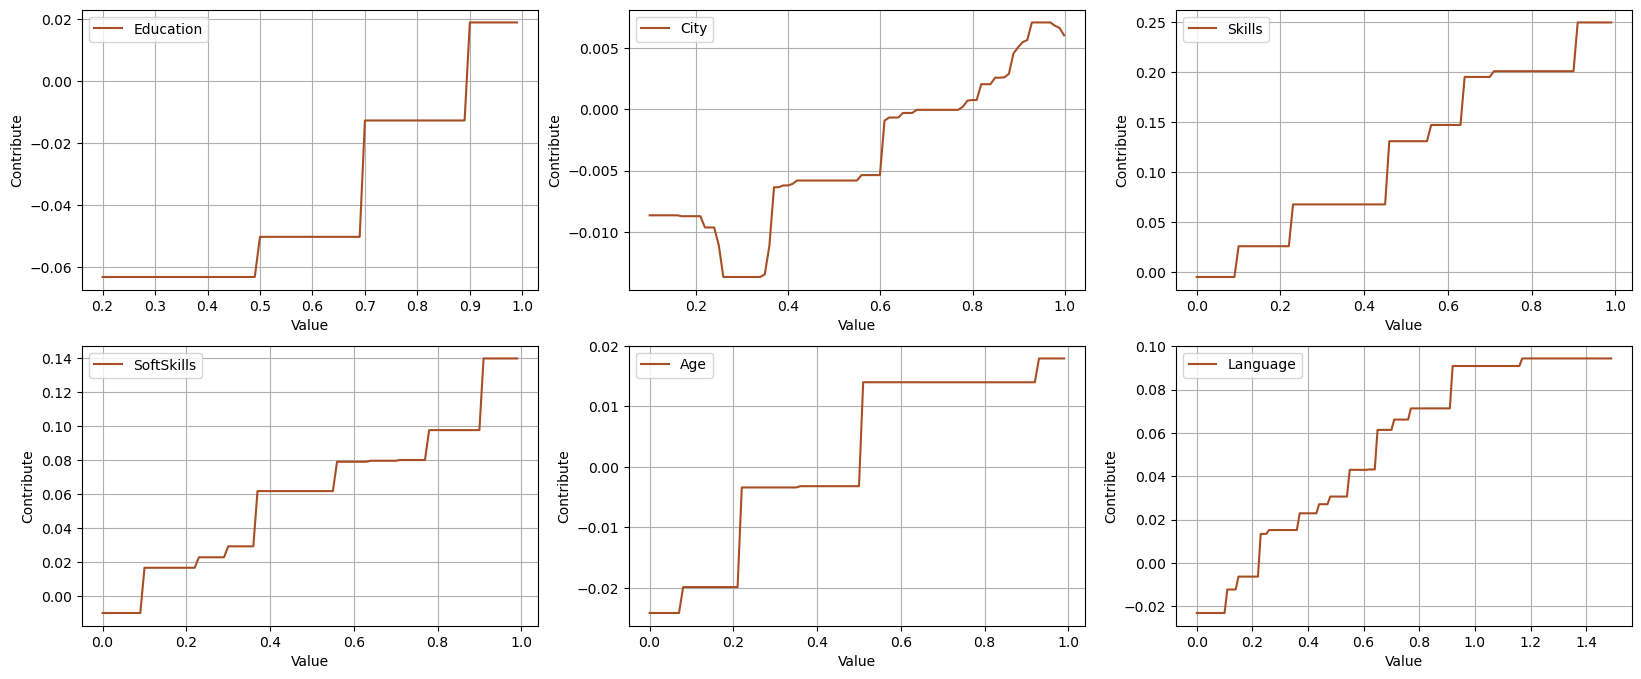

In [11]:
f, axs = plt.subplots(ncols=3,nrows=2,figsize=(20,8))

for i, feature in enumerate(best_model.feature_names[:6]):

    x,y = gs.explanation(best_model, i)
    axs[int(i/3)][i%3].set_xlabel("Value")
    axs[int(i/3)][i%3].set_ylabel("Contribute")
    axs[int(i/3)][i%3].grid()
    axs[int(i/3)][i%3].plot(x,y, label=feature, color="#a74e25")
    axs[int(i/3)][i%3].legend()
plt.show()

# Grid search - balanced

In [12]:
gs = EBMGridSearch(**gridsearch_parameters2)

In [13]:
best_ = gs.grid_search(
    EBMModel=ExplainableBoostingRegressor,
    hyperparameters=EBM_parameter)
gs.save_model(best_[0], name="EBMReg_balanced")

100%|██████████| 648/648 [02:52<00:00,  3.77it/s, nDCG_15_at=0.883]


In [14]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1, 10, 15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1, 10, 15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1, 10, 15])

display(pd.DataFrame([nDCG_train, nDCG_valid, nDCG_test], index=["Training", "Validation", "Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.9383,0.9376,0.9269
Validation,0.9500,0.9057,0.8884
Test,0.9317,0.9324,0.9109
